In [89]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import get_param_from_json
from scipy.stats import gaussian_kde

from ler.rates import LeR

In [90]:
# initialize LeR
ler = LeR(
    npool=8,
    verbose=False,
    # SNR related
    sampling_frequency =  2048,
    waveform_approximant =  'IMRPhenomD',
    minimum_frequency =  20.0,
    snr_type =  'interpolation',
    ifos =  ['L1','H1','V1'],
    # GW related
    source_priors= {
        'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 
        'source_frame_masses': 'binary_masses_BBH_popI_II_powerlaw_gaussian', 
        'zs': 'sample_source_redshift', 
        'geocent_time': 'sampler_uniform', 
        'ra': 'sampler_uniform', 
        'dec': 'sampler_cosine', 
        'phase': 'sampler_uniform', 
        'psi': 'sampler_uniform', 
        'theta_jn': 'sampler_sine'
        },      
    source_priors_params= {
        'merger_rate_density': {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30.}, 
        'source_frame_masses': {'mminbh': 4.98, 'mmaxbh': 112.5, 'alpha': 3.78, 'mu_g': 32.27, 'sigma_g': 3.88, 'lambda_peak': 0.03, 'delta_m': 4.8, 'beta': 0.81}, 
        'zs': None, 
        'geocent_time': {'min_': 1238166018, 'max_': 1269702018}, 
        'ra': {'min_': 0.0, 'max_': 6.283185307179586}, 
        'dec': None, 
        'phase': {'min_': 0.0, 'max_': 6.283185307179586}, 
        'psi': {'min_': 0.0, 'max_': 3.141592653589793}, 
        'theta_jn': None
        },
    spin_zero= True,
    spin_precession= False,
    # lens related
    lens_type =  'epl_galaxy',
    lens_functions =  {
        'strong_lensing_condition': 'rjs_with_cross_section_SIS', 
        'optical_depth': 'optical_depth_SIS_haris', 
        'param_sampler_type': 'sample_all_routine',
        },
    lens_priors =  {
        'source_redshift_sl': 'strongly_lensed_source_redshifts', 
        'lens_redshift': 'lens_redshift_SDSS_catalogue', 
        'velocity_dispersion': 'velocity_dispersion_gengamma', 
        'axis_ratio': 'axis_ratio_rayleigh', 
        'axis_rotation_angle': 'axis_rotation_angle_uniform', 
        'shear': 'shear_norm', 
        'mass_density_spectral_index': 'mass_density_spectral_index_normal', 
        'source_parameters': 'sample_gw_parameters',
        },
    lens_priors_params =  {
        'source_redshift_sl': None, 
        'lens_redshift': None, 
        'velocity_dispersion': {'a':2.32 / 2.67, 'c':2.67}, 
        'axis_ratio': {'q_min': 0.2, 'q_max': 1.0}, 
        'axis_rotation_angle': {'phi_min': 0.0, 'phi_max': 2*np.pi}, 
        'shear': {'scale': 0.05}, 
        'mass_density_spectral_index': {'mean': 2.0, 'std': 0.2}, 'source_parameters': None
    },
    # image related
    n_min_images = 2,
    n_max_images = 4,
    lens_model_list =  ['EPL_NUMBA', 'SHEAR'],
)


In [91]:
unlensed_param_det = ler.selecting_n_unlensed_detectable_events(size=20000)

collected number of detectable events =  0
collected number of detectable events =  222
total number of events =  50000
total unlensed rate (yr^-1): 459.64166077977615
collected number of detectable events =  422
total number of events =  100000
total unlensed rate (yr^-1): 436.8666235339314
collected number of detectable events =  664
total number of events =  150000
total unlensed rate (yr^-1): 458.2613554921492
collected number of detectable events =  862
total number of events =  200000
total unlensed rate (yr^-1): 446.18368422541334
collected number of detectable events =  1073
total number of events =  250000
total unlensed rate (yr^-1): 444.3202720871169
collected number of detectable events =  1282
total number of events =  300000
total unlensed rate (yr^-1): 442.3878446844392
collected number of detectable events =  1480
total number of events =  350000
total unlensed rate (yr^-1): 437.75396264740584
collected number of detectable events =  1678
total number of events =  40000

In [92]:
# ler.batch_size = 200000
# lensed_param = ler.lensed_cbc_statistics(size=20000, resume=True, save_batch=False, output_jsonfile='lensed_cbc_bbh3.json')

lensed_param_det = ler.selecting_n_lensed_detectable_events(size=10000)

collected number of detectable events =  0


100%|████████████████████████████████████████████████████████| 50000/50000 [01:48<00:00, 459.58it/s]


collected number of events =  213
total number of events =  50000
total lensed rate (yr^-1): 0.43059320412220425


100%|████████████████████████████████████████████████████████| 50000/50000 [01:39<00:00, 501.93it/s]


collected number of events =  429
total number of events =  100000
total lensed rate (yr^-1): 0.4336255506301071


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.25s/it]


collected number of events =  641
total number of events =  150000
total lensed rate (yr^-1): 0.4319409136812722


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:17<00:00,  8.83s/it]


collected number of events =  847
total number of events =  200000
total lensed rate (yr^-1): 0.4280662486989519


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.61s/it]


collected number of events =  1048
total number of events =  250000
total lensed rate (yr^-1): 0.4237198853709578


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.27s/it]


collected number of events =  1256
total number of events =  300000
total lensed rate (yr^-1): 0.4231808015473306


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.65s/it]


collected number of events =  1460
total number of events =  350000
total lensed rate (yr^-1): 0.421640562051253


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.32s/it]


collected number of events =  1661
total number of events =  400000
total lensed rate (yr^-1): 0.41972729580221907


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.36s/it]


collected number of events =  1863
total number of events =  450000
total lensed rate (yr^-1): 0.41846381809059285


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:07<00:00,  3.60s/it]


collected number of events =  2067
total number of events =  500000
total lensed rate (yr^-1): 0.4178573487890123


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.77s/it]


collected number of events =  2306
total number of events =  550000
total lensed rate (yr^-1): 0.4237933968014524


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.72s/it]


collected number of events =  2525
total number of events =  600000
total lensed rate (yr^-1): 0.425370829580816


100%|████████████████████████████████████████████████████████| 50000/50000 [01:30<00:00, 550.64it/s]


collected number of events =  2765
total number of events =  650000
total lensed rate (yr^-1): 0.42997118432571135


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.41s/it]


collected number of events =  3008
total number of events =  700000
total lensed rate (yr^-1): 0.43434753789389347


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.69s/it]


collected number of events =  3208
total number of events =  750000
total lensed rate (yr^-1): 0.43234522654899255


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.82s/it]


collected number of events =  3411
total number of events =  800000
total lensed rate (yr^-1): 0.4309722474356921


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.15s/it]


collected number of events =  3650
total number of events =  850000
total lensed rate (yr^-1): 0.43404175505276044


100%|████████████████████████████████████████████████████████| 50000/50000 [01:40<00:00, 496.39it/s]


collected number of events =  3857
total number of events =  900000
total lensed rate (yr^-1): 0.4331763141104178


100%|████████████████████████████████████████████████████████| 50000/50000 [01:20<00:00, 618.67it/s]


collected number of events =  4087
total number of events =  950000
total lensed rate (yr^-1): 0.43484912904557665


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.50s/it]


collected number of events =  4328
total number of events =  1000000
total lensed rate (yr^-1): 0.4374665228734507


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.34s/it]


collected number of events =  4529
total number of events =  1050000
total lensed rate (yr^-1): 0.435984042358476


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.31s/it]


collected number of events =  4774
total number of events =  1100000
total lensed rate (yr^-1): 0.43867946147661185


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.72s/it]


collected number of events =  4977
total number of events =  1150000
total lensed rate (yr^-1): 0.4374489440531151


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.39s/it]


collected number of events =  5194
total number of events =  1200000
total lensed rate (yr^-1): 0.43750021561242736


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:09<00:00,  4.57s/it]


collected number of events =  5413
total number of events =  1250000
total lensed rate (yr^-1): 0.4377091105940829


100%|████████████████████████████████████████████████████████| 50000/50000 [01:22<00:00, 605.18it/s]


collected number of events =  5623
total number of events =  1300000
total lensed rate (yr^-1): 0.43720216445994126


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.38s/it]


collected number of events =  5836
total number of events =  1350000
total lensed rate (yr^-1): 0.43695738815113616


100%|████████████████████████████████████████████████████████| 50000/50000 [01:34<00:00, 530.66it/s]


collected number of events =  6031
total number of events =  1400000
total lensed rate (yr^-1): 0.4354305187895731


100%|████████████████████████████████████████████████████████| 50000/50000 [01:25<00:00, 586.72it/s]


collected number of events =  6246
total number of events =  1450000
total lensed rate (yr^-1): 0.43540313306577433


100%|████████████████████████████████████████████████████████| 50000/50000 [01:17<00:00, 642.91it/s]


collected number of events =  6463
total number of events =  1500000
total lensed rate (yr^-1): 0.43551234401280225


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.02s/it]


collected number of events =  6648
total number of events =  1550000
total lensed rate (yr^-1): 0.4335277330008199


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.27s/it]


collected number of events =  6870
total number of events =  1600000
total lensed rate (yr^-1): 0.434004593943595


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.39s/it]


collected number of events =  7093
total number of events =  1650000
total lensed rate (yr^-1): 0.43451381374858367


100%|████████████████████████████████████████████████████████| 50000/50000 [01:42<00:00, 489.96it/s]


collected number of events =  7313
total number of events =  1700000
total lensed rate (yr^-1): 0.4348147061234024


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.92s/it]


collected number of events =  7536
total number of events =  1750000
total lensed rate (yr^-1): 0.4352716815915401


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.24s/it]


collected number of events =  7762
total number of events =  1800000
total lensed rate (yr^-1): 0.43587173322855366


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.78s/it]


collected number of events =  7990
total number of events =  1850000
total lensed rate (yr^-1): 0.43654862338997746


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.30s/it]


collected number of events =  8201
total number of events =  1900000
total lensed rate (yr^-1): 0.4362855037072149


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.20s/it]


collected number of events =  8406
total number of events =  1950000
total lensed rate (yr^-1): 0.4357248674432706


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.03s/it]


collected number of events =  8635
total number of events =  2000000
total lensed rate (yr^-1): 0.4364052015956847


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.78s/it]


collected number of events =  8846
total number of events =  2050000
total lensed rate (yr^-1): 0.4361648326651802


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.80s/it]


collected number of events =  9053
total number of events =  2100000
total lensed rate (yr^-1): 0.43574337993721385


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.13s/it]


collected number of events =  9260
total number of events =  2150000
total lensed rate (yr^-1): 0.435341529661711


100%|████████████████████████████████████████████████████████| 50000/50000 [01:24<00:00, 593.47it/s]


collected number of events =  9473
total number of events =  2200000
total lensed rate (yr^-1): 0.4352336131721768


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:07<00:00,  3.90s/it]


collected number of events =  9710
total number of events =  2250000
total lensed rate (yr^-1): 0.43620866061832064


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.11s/it]


collected number of events =  9933
total number of events =  2300000
total lensed rate (yr^-1): 0.43652605598549243


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.52s/it]


collected number of events =  10147
total number of events =  2350000
total lensed rate (yr^-1): 0.4364428371019885
storing detectable lensed params in ./ler_data/n_lensed_params_detectable.json

 trmming final result to size=10000


In [93]:
lensed_param_det = get_param_from_json('/home/lisali/surip/ler_data/n_lensed_params_detectable.json')
snr = lensed_param_det['optimal_snr_net']

In [94]:
# ratio of double, triple and quadruple images
idx1 = abs(snr)>8
idx2 = np.sum(idx1, axis=1)
ratio_double = np.sum(idx2==2)/len(idx2)
ratio_triple = np.sum(idx2==3)/len(idx2)
ratio_quadruple = np.sum(idx2==4)/len(idx2)
print(ratio_double)
print(ratio_triple)
print(ratio_quadruple)

0.7484
0.184
0.0676


In [95]:
# time delay
time_delay = lensed_param_det['time_delays']

In [96]:
# 2 images
idx_row_double = np.array(idx2 == 2)
idx1_double =idx1[idx_row_double]

t_delay_double = (time_delay[idx_row_double][idx1_double]).reshape(-1,2)

dt12_dou = abs(t_delay_double[:,1]-t_delay_double[:,0])/ (24*3600)
dt12_dou = dt12_dou[~np.isnan(dt12_dou)]
log_t12_dou = np.log10(dt12_dou)

In [97]:
# KDE plot
from sklearn.neighbors import KernelDensity

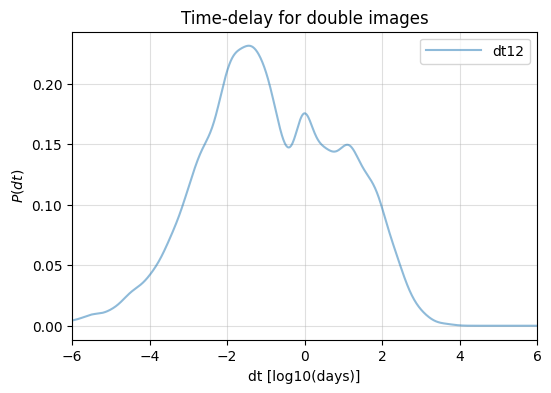

In [98]:
# plot
plt.figure(figsize=(6,4))
dt_log = np.linspace(-6, 6, 1000)

kde_log_t12_dou = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(log_t12_dou).reshape(-1,1))
plt.plot(dt_log, np.exp(kde_log_t12_dou.score_samples(dt_log.reshape(-1,1))), label='dt12', color='C0', linestyle='-', alpha=0.5)

plt.xlabel(r'dt [log10(days)]')
plt.ylabel(r'$P(dt)$')
plt.title('Time-delay for double images')
leg = plt.legend(handlelength=4)
for line in leg.get_lines():
    line.set_linewidth(1.5)
plt.grid(alpha=0.4)
plt.xlim(-6, 6)
plt.show()

In [99]:
# 3 images
idx_row_triple = np.array(idx2 == 3)
idx1_triple =idx1[idx_row_triple]

t_delay_triple = (time_delay[idx_row_triple][idx1_triple]).reshape(-1,3)

In [100]:
dt12_tri = abs(t_delay_triple[:,1]-t_delay_triple[:,0])/ (24*3600)
dt23_tri = abs(t_delay_triple[:,2]-t_delay_triple[:,1])/ (24*3600)

dt12_tri = dt12_tri[~np.isnan(dt12_tri)]
dt23_tri = dt23_tri[~np.isnan(dt23_tri)]

log_t12_tri = np.log10(dt12_tri)
log_t23_tri = np.log10(dt23_tri)

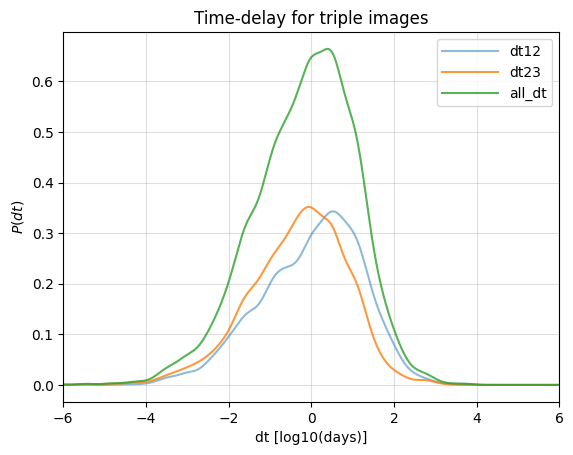

In [101]:
# triple images
kde_log_t12_tri = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(log_t12_tri).reshape(-1,1))
kde_log_t23_tri = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(log_t23_tri).reshape(-1,1))

plt.plot(dt_log, np.exp(kde_log_t12_tri.score_samples(dt_log.reshape(-1,1))), label='dt12', color='C0', linestyle='-', alpha=0.5)
plt.plot(dt_log, np.exp(kde_log_t23_tri.score_samples(dt_log.reshape(-1,1))), label='dt23', color='C1', linestyle='-', alpha=0.8)
plt.plot(dt_log, np.exp(kde_log_t12_tri.score_samples(dt_log.reshape(-1,1)))+np.exp(kde_log_t23_tri.score_samples(dt_log.reshape(-1,1))), label='all_dt', color='C2', linestyle='-', alpha=0.8)

plt.xlabel(r'dt [log10(days)]')
plt.ylabel(r'$P(dt)$')
plt.title('Time-delay for triple images')
leg = plt.legend(handlelength=4)
for line in leg.get_lines():
    line.set_linewidth(1.5)
plt.grid(alpha=0.4)
plt.xlim(-6, 6)
plt.show()

In [102]:
# 4 images
idx_row_quadruple = np.array(idx2 == 4)
idx1_quadruple =idx1[idx_row_quadruple]

t_delay_quadruple = (time_delay[idx_row_quadruple][idx1_quadruple]).reshape(-1,4)

In [103]:
dt12_qua = abs(t_delay_quadruple[:,1]-t_delay_quadruple[:,0])/ (24*3600)
dt23_qua = abs(t_delay_quadruple[:,2]-t_delay_quadruple[:,1])/ (24*3600)
dt34_qua = abs(t_delay_quadruple[:,3]-t_delay_quadruple[:,2])/ (24*3600)

dt12_qua = dt12_qua[~np.isnan(dt12_qua)]
dt23_qua = dt23_qua[~np.isnan(dt23_qua)]
dt34_qua = dt34_qua[~np.isnan(dt34_qua)]

log_t12_qua = np.log10(dt12_qua)
log_t23_qua = np.log10(dt23_qua)
log_t34_qua = np.log10(dt34_qua)

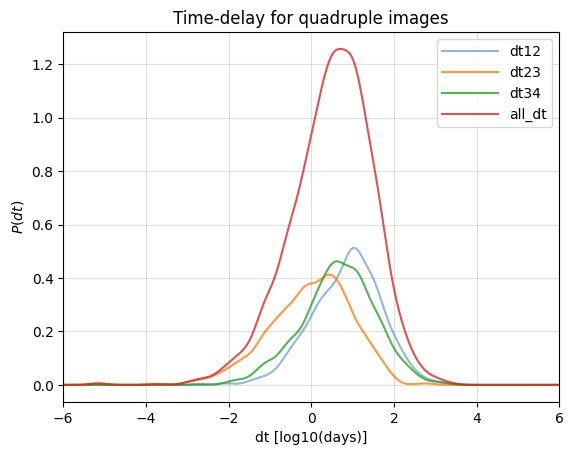

In [104]:
# quadruple images
kde_log_t12_qua = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(log_t12_qua).reshape(-1,1))
kde_log_t23_qua = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(log_t23_qua).reshape(-1,1))
kde_log_t34_qua = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(log_t34_qua).reshape(-1,1))

plt.plot(dt_log, np.exp(kde_log_t12_qua.score_samples(dt_log.reshape(-1,1))), label='dt12', color='C0', linestyle='-', alpha=0.5)
plt.plot(dt_log, np.exp(kde_log_t23_qua.score_samples(dt_log.reshape(-1,1))), label='dt23', color='C1', linestyle='-', alpha=0.8)
plt.plot(dt_log, np.exp(kde_log_t34_qua.score_samples(dt_log.reshape(-1,1))), label='dt34', color='C2', linestyle='-', alpha=0.8)
plt.plot(dt_log, np.exp(kde_log_t12_qua.score_samples(dt_log.reshape(-1,1)))+np.exp(kde_log_t23_qua.score_samples(dt_log.reshape(-1,1)))+np.exp(kde_log_t34_qua.score_samples(dt_log.reshape(-1,1))), label='all_dt', color='C3', linestyle='-', alpha=0.8)

plt.xlabel(r'dt [log10(days)]')
plt.ylabel(r'$P(dt)$')
plt.title('Time-delay for quadruple images')
leg = plt.legend(handlelength=4)
for line in leg.get_lines():
    line.set_linewidth(1.5)
plt.grid(alpha=0.4)
plt.xlim(-6, 6)
plt.show()

In [105]:
# Einstein radius
theta_E_det = lensed_param_det["theta_E"]

In [106]:
zs_prior = ler.sample_source_redshift(size=100000)
zl_prior = ler.sample_lens_redshift(zs=zs_prior)
sigma_prior = ler.sample_velocity_dispersion(len(zs_prior))

In [107]:
theta_E_prior = ler.compute_einstein_radii(sigma_prior,zl_prior, zs_prior)

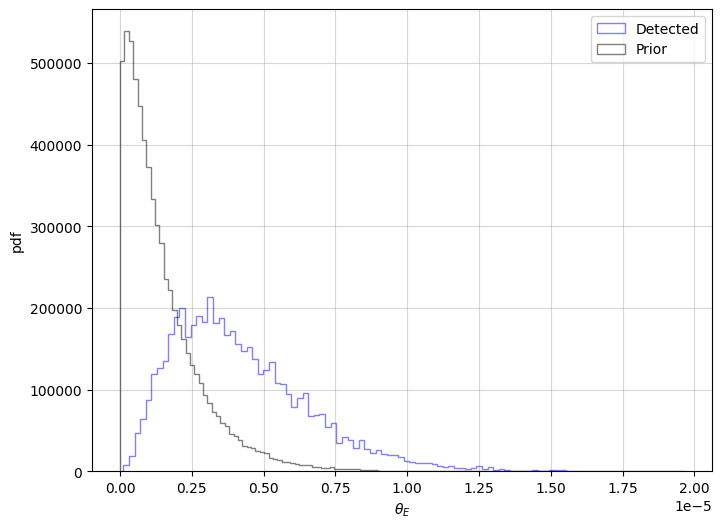

In [108]:
# plt hist
plt.figure(figsize=(8, 6))
plt.hist(theta_E_det, bins=100, alpha=0.5, label='Detected', color='blue', density=True, histtype='step')
plt.hist(theta_E_prior, bins=100, alpha=0.5, label='Prior', color='black', density=True, histtype='step')
plt.xlabel(r'$\theta_E$')
plt.ylabel('pdf')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

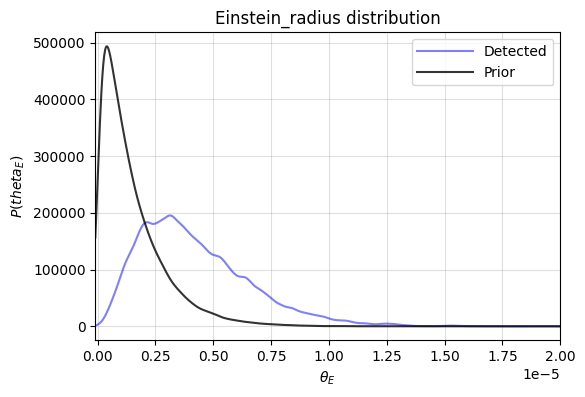

In [109]:
# KDE
from sklearn.neighbors import KernelDensity

kde_theta_E_prior = KernelDensity(kernel='gaussian', bandwidth=2e-7).fit(np.array(theta_E_prior).reshape(-1,1))
kde_theta_E_det = KernelDensity(kernel='gaussian', bandwidth=2e-7).fit(np.array(theta_E_det).reshape(-1,1))

# plot
plt.figure(figsize=(6,4))
d_theta_E = np.linspace(-1e-7, 2e-5, 1000)
plt.plot(d_theta_E, np.exp(kde_theta_E_det.score_samples(d_theta_E.reshape(-1,1))), label='Detected', color='blue', linestyle='-', alpha=0.5)
plt.plot(d_theta_E, np.exp(kde_theta_E_prior.score_samples(d_theta_E.reshape(-1,1))), label='Prior', color='black', linestyle='-', alpha=0.8)

plt.xlabel(r'$\theta_E$')
plt.ylabel(r'$P(theta_E)$')
plt.title('Einstein_radius distribution')
leg = plt.legend(handlelength=4)
for line in leg.get_lines():
    line.set_linewidth(1.5)
plt.grid(alpha=0.4)
plt.xlim(-1e-7, 2e-5)
#plt.savefig("redshift_distribution_bns.png")
plt.show()

In [110]:
# Redshift distribution
unlensed_param_det = get_param_from_json("/home/lisali/surip/ler_data/n_unlensed_param_detectable.json")
lensed_param_det = get_param_from_json('/home/lisali/surip/ler_data/n_lensed_params_detectable.json')

In [111]:
# source redshift
zs_unlensed_det = unlensed_param_det["zs"]
zs_lensed_det = lensed_param_det["zs"]

# quadruple images
qua_zs_lensed_det = lensed_param_det['zs'][idx_row_quadruple]

In [112]:
# lens redshift
zl_prior = ler.sample_lens_redshift(zs=zs_prior)

# quadtuple lenses
qua_zl_lensed = lensed_param_det['zl'][idx_row_quadruple]

In [113]:
from sklearn.neighbors import KernelDensity

kde_zs_unlensed = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(zs_unlensed_det).reshape(-1,1))
kde_zs_lensed = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(zs_lensed_det).reshape(-1,1))
kde_qua_zs_lensed = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(qua_zs_lensed_det).reshape(-1,1))

kde_zl_unlensed = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(zl_prior).reshape(-1,1))
kde_qua_zl_lensed = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(qua_zl_lensed).reshape(-1,1))

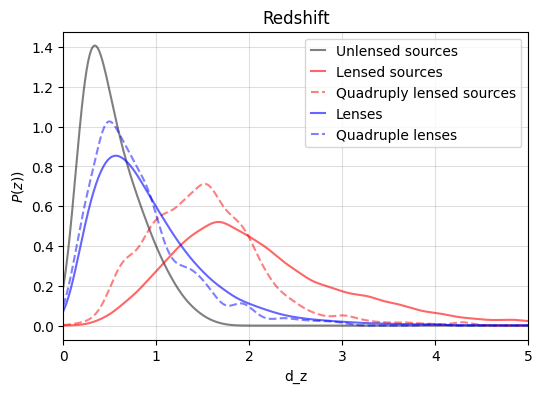

In [114]:
# plot
plt.figure(figsize=(6,4))
d_z = np.linspace(0, 5, 1000)
plt.plot(d_z, np.exp(kde_zs_unlensed.score_samples(d_z.reshape(-1,1))), label='Unlensed sources', color='black', linestyle='-', alpha=0.5)
plt.plot(d_z, np.exp(kde_zs_lensed.score_samples(d_z.reshape(-1,1))), label='Lensed sources', color='red', linestyle='-', alpha=0.6)
plt.plot(d_z, np.exp(kde_qua_zs_lensed.score_samples(d_z.reshape(-1,1))), label='Quadruply lensed sources', color='red', linestyle='--', alpha=0.5)

plt.plot(d_z, np.exp(kde_zl_unlensed.score_samples(d_z.reshape(-1,1))), label='Lenses', color='blue', linestyle='-', alpha=0.6)
plt.plot(d_z, np.exp(kde_qua_zl_lensed.score_samples(d_z.reshape(-1,1))), label='Quadruple lenses', color='blue', linestyle='--', alpha=0.5)

plt.xlabel(r'd_z')
plt.ylabel(r'$P(z))$')
plt.title('Redshift')
leg = plt.legend(handlelength=1)
for line in leg.get_lines():
    line.set_linewidth(1.5)
plt.grid(alpha=0.4)
plt.xlim(0, 5)
plt.show()